<a href="https://colab.research.google.com/github/dk-wei/nlp-topic-modeling/blob/main/Top2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install top2vec

In [3]:
from top2vec import Top2Vec
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

model = Top2Vec(documents=newsgroups.data, speed="learn", workers=8, embedding_model='universal-sentence-encoder')

2021-03-17 23:30:27,977 - top2vec - INFO - Pre-processing documents for training
2021-03-17 23:30:35,374 - top2vec - INFO - Creating joint document/word embedding
2021-03-17 23:40:40,055 - top2vec - INFO - Creating lower dimension embedding of documents
2021-03-17 23:41:17,249 - top2vec - INFO - Finding dense areas of documents
2021-03-17 23:41:19,557 - top2vec - INFO - Finding topics


# Important parameters for Top2Vec model：

- `documents`: Input corpus, should be a list of strings.

- `speed`: This parameter will determine how fast the model takes to train. The 'fast-learn' option is the fastest and will generate the lowest quality vectors. The 'learn' option will learn better quality vectors but take a longer time to train. The 'deep-learn' option will learn the best quality vectors but will take significant time to train.

- `workers`: The amount of worker threads to be used in training the model. Larger amount will lead to faster training.

# Pre-trained Doc2Vec model:

Doc2Vec will be used by default to generate the joint word and document embeddings. However there are also pretrained embedding_model options for generating joint word and document embeddings:

- universal-sentence-encoder
- universal-sentence-encoder-multilingual
- distiluse-base-multilingual-cased

For large data sets and data sets with very unique vocabulary doc2vec could produce better results. This will train a doc2vec model from scratch. This method is language agnostic. However multiple languages will not be aligned.

Using the universal sentence encoder options will be much faster since those are pre-trained and efficient models. The universal sentence encoder options are suggested for smaller data sets. They are also good options for large data sets that are in English or in languages covered by the multilingual model. It is also suggested for data sets that are multilingual.

The distiluse-base-multilingual-cased pre-trained sentence transformer is suggested for multilingual datasets and languages that are not covered by the multilingual universal sentence encoder. The transformer is significantly slower than the universal sentence encoder options.

# Get Number of Topics

This will return the number of topics that Top2Vec has found in the data.

In [17]:
model.get_num_topics()

120

# Get Topic Sizes

This will return the number of documents most similar to each topic. Topics are in decreasing order of size.



In [5]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [14]:
topic_sizes, topic_nums

(array([1158,  778,  738,  676,  625,  576,  575,  493,  474,  420,  407,
         346,  329,  329,  326,  280,  262,  260,  258,  258,  229,  228,
         211,  208,  200,  196,  195,  188,  185,  176,  174,  173,  161,
         161,  157,  155,  146,  139,  136,  125,  123,  122,  119,  118,
         115,  113,  112,  111,  111,  110,  109,  109,  107,  106,  106,
         105,  103,  103,  101,   98,   96,   95,   94,   90,   84,   82,
          81,   81,   81,   78,   78,   76,   75,   74,   73,   73,   71,
          70,   68,   67,   65,   63,   62,   62,   62,   61,   60,   60,
          59,   59,   58,   58,   56,   55,   54,   54,   53,   52,   52,
          52,   47,   47,   46,   46,   45,   44,   43,   43,   41,   40,
          40,   39,   38,   36,   34,   34,   34,   33,   33,   27]),
 array([  6, 114,  38,  91,  80]))

Returns:

- `topic_sizes`: The number of documents most similar to each topic.

- `topic_nums`: The unique index of every topic will be returned.

# Get Topics

This will return the topics in decreasing size.

Returns:

- `topic_words`: For each topic the top 50 words are returned, in order of semantic similarity to topic.

- `word_scores`: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

- `topic_nums`: The unique index of every topic will be returned.



In [6]:
topic_words, word_scores, topic_nums = model.get_topics(77)

In [15]:
topic_words, word_scores, topic_nums

([array(['symptoms', 'patients', 'therapy', 'treatment', 'patient', 'diet',
         'doctor', 'disease', 'clinical', 'vitamin', 'treatments',
         'physician', 'infection', 'diagnosis', 'candida', 'yeast',
         'medical', 'diagnosed', 'doctors', 'syndrome', 'chronic',
         'effects', 'nutrition', 'physicians', 'infections', 'foods',
         'placebo', 'liver', 'pain', 'eating', 'dose', 'severe', 'kidney',
         'medicine', 'illness', 'bacteria', 'surgery', 'food', 'breast',
         'cancer', 'cure', 'studies', 'med', 'oral', 'immune', 'depression',
         'brain', 'drugs', 'diseases', 'toxic'], dtype='<U15'),
  array(['insurance', 'hospitals', 'health', 'private', 'canadian',
         'doctors', 'care', 'fees', 'canada', 'costs', 'funds', 'coverage',
         'spending', 'reform', 'medicine', 'taxes', 'income', 'french',
         'economy', 'services', 'pay', 'hospital', 'paying', 'americans',
         'money', 'fund', 'province', 'sector', 'germans', 'spend',
     

# Search Topics

We are going to search for topics most similar to medicine.

In [7]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)

In [16]:
topic_words, word_scores, topic_scores, topic_nums

([array(['symptoms', 'patients', 'therapy', 'treatment', 'patient', 'diet',
         'doctor', 'disease', 'clinical', 'vitamin', 'treatments',
         'physician', 'infection', 'diagnosis', 'candida', 'yeast',
         'medical', 'diagnosed', 'doctors', 'syndrome', 'chronic',
         'effects', 'nutrition', 'physicians', 'infections', 'foods',
         'placebo', 'liver', 'pain', 'eating', 'dose', 'severe', 'kidney',
         'medicine', 'illness', 'bacteria', 'surgery', 'food', 'breast',
         'cancer', 'cure', 'studies', 'med', 'oral', 'immune', 'depression',
         'brain', 'drugs', 'diseases', 'toxic'], dtype='<U15'),
  array(['insurance', 'hospitals', 'health', 'private', 'canadian',
         'doctors', 'care', 'fees', 'canada', 'costs', 'funds', 'coverage',
         'spending', 'reform', 'medicine', 'taxes', 'income', 'french',
         'economy', 'services', 'pay', 'hospital', 'paying', 'americans',
         'money', 'fund', 'province', 'sector', 'germans', 'spend',
     

In [8]:
topic_nums

array([  6, 114,  38,  91,  80])

In [9]:
topic_scores

array([0.44640645, 0.37942662, 0.24187459, 0.22866668, 0.21082986])

Returns:

- `topic_words`: For each topic the top 50 words are returned, in order of semantic similarity to topic.

- `word_scores`: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

- `topic_scores`: For each topic the cosine similarity to the search keywords will be returned.

- `topic_nums`: The unique index of every topic will be returned.


> Topic 6 was the most similar topic to "medicine" with a cosine similarity of 0.446. (Values can be from least similar 0, to most similar 1)

# Generate Word Clouds

Using a topic number you can generate a word cloud. We are going to generate word clouds for the top 5 most similar topics to our medicine topic search from above.

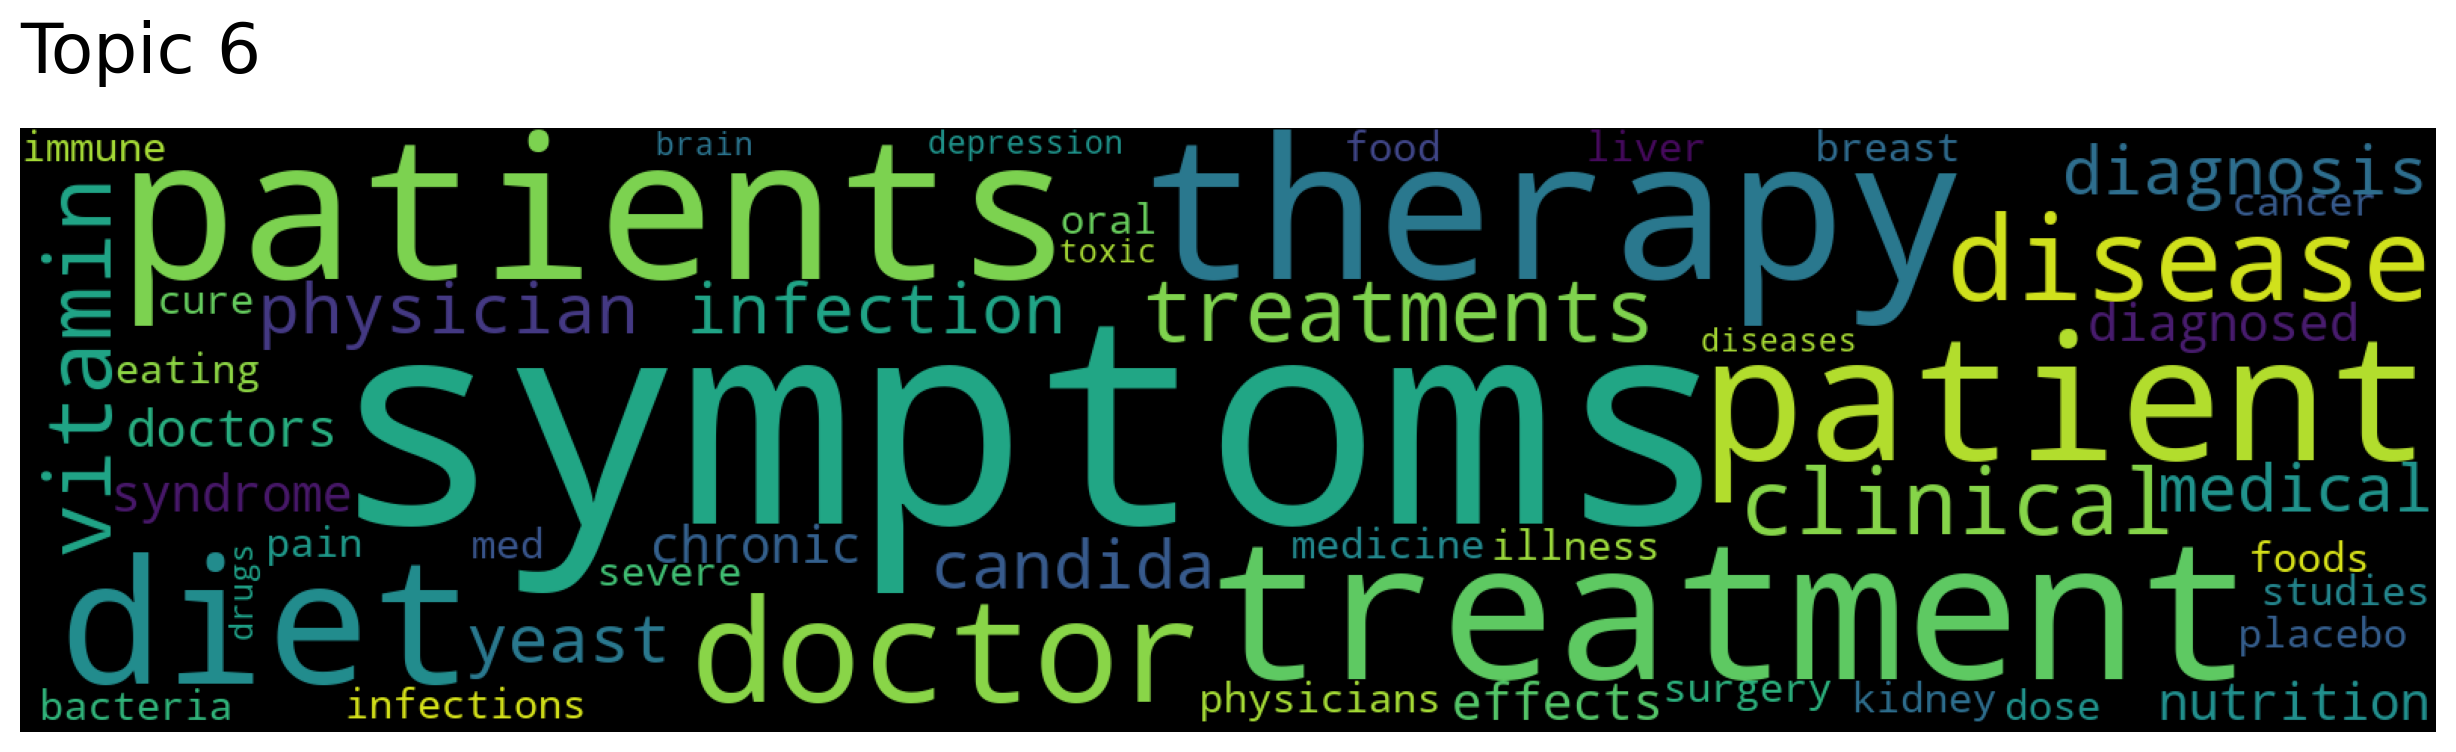

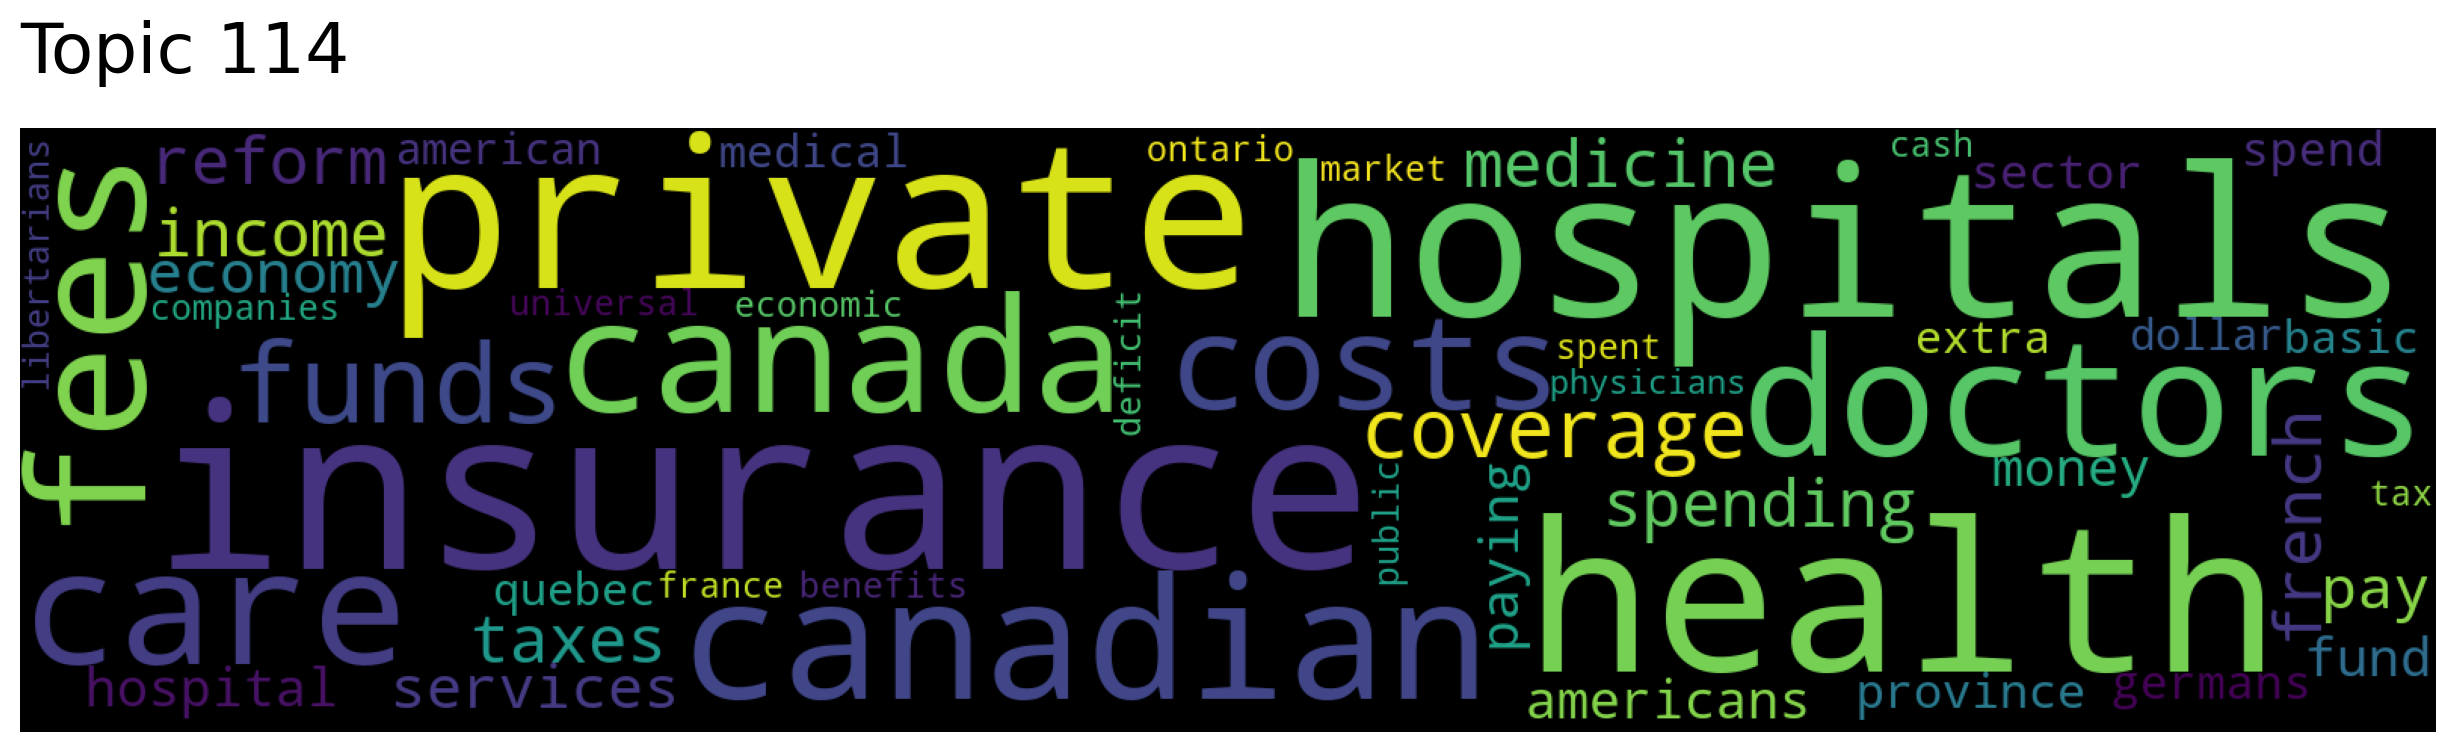

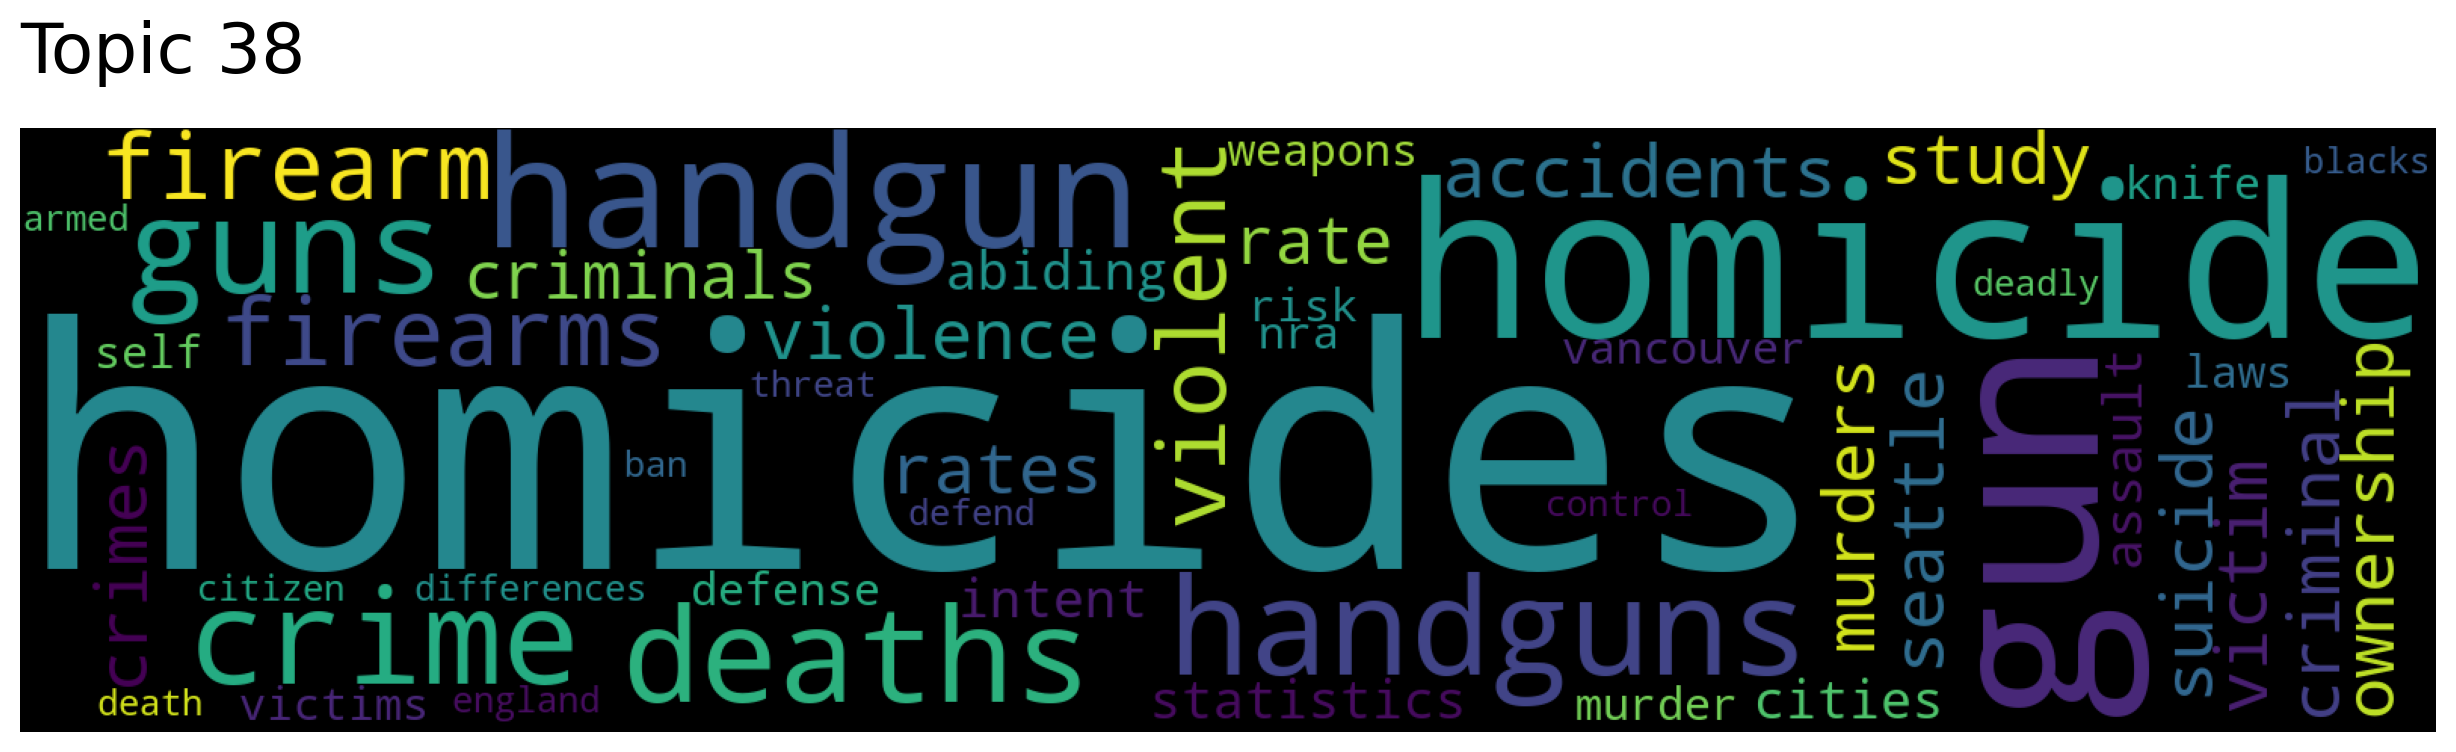

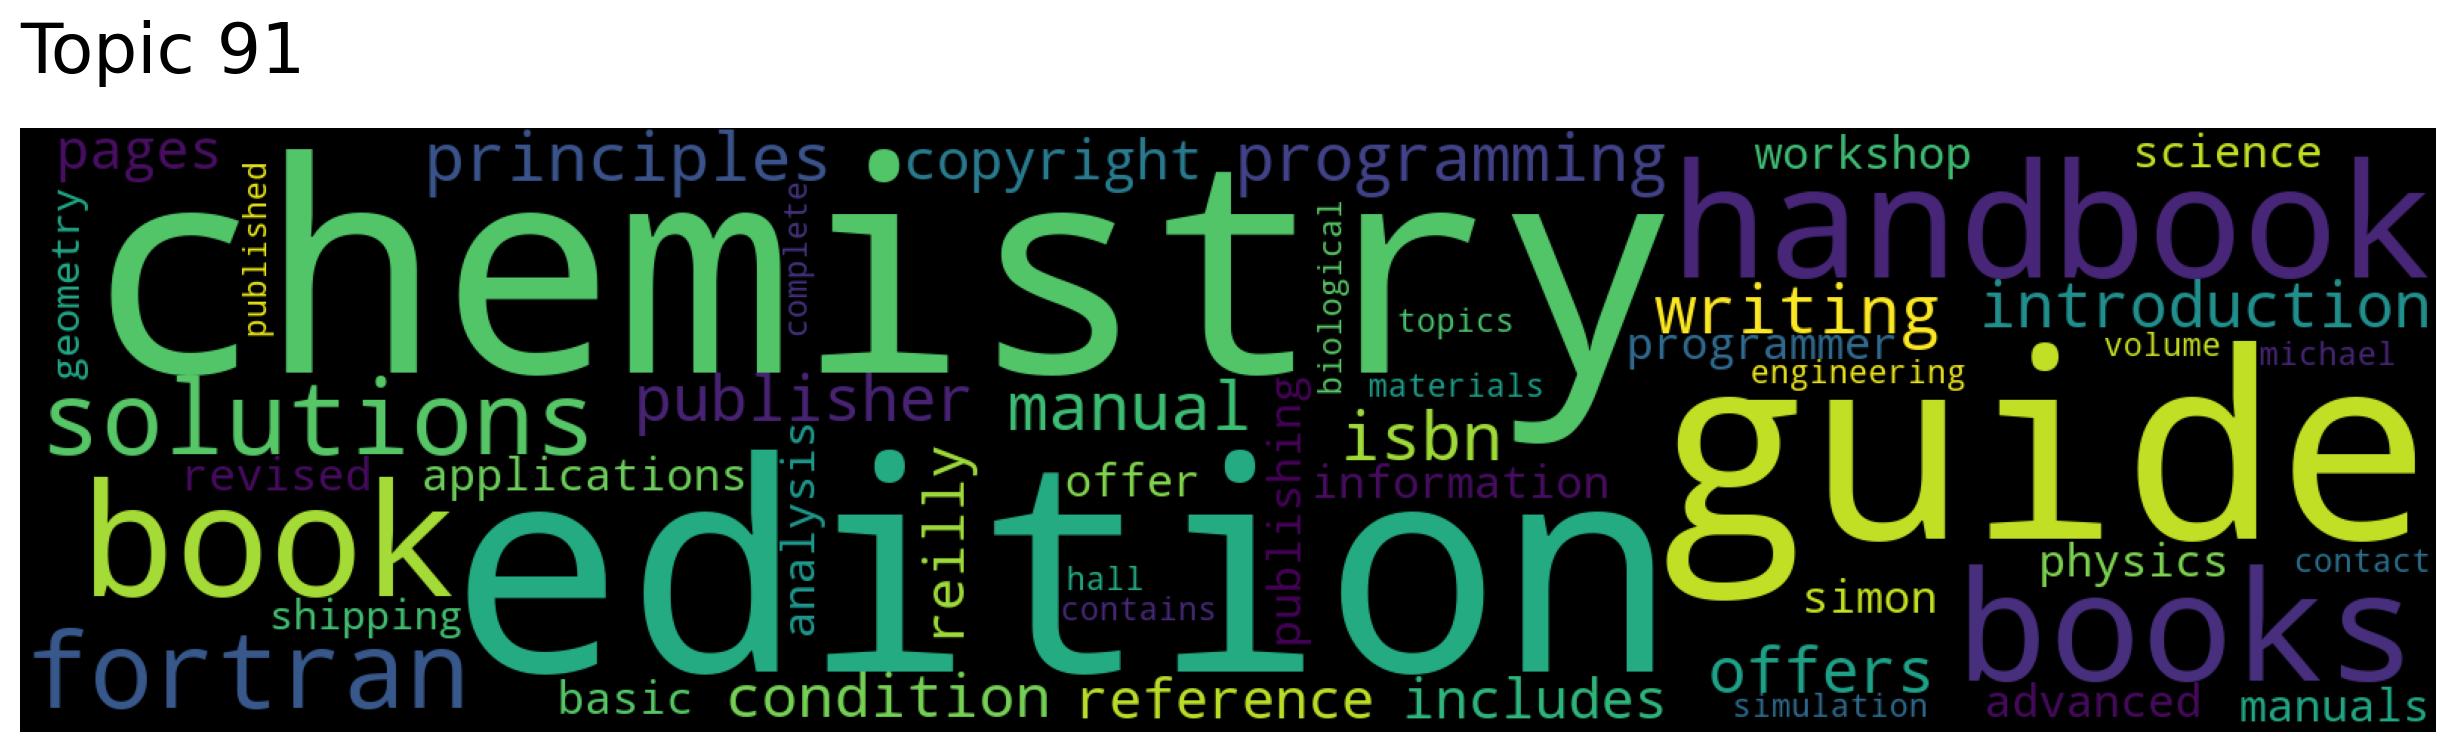

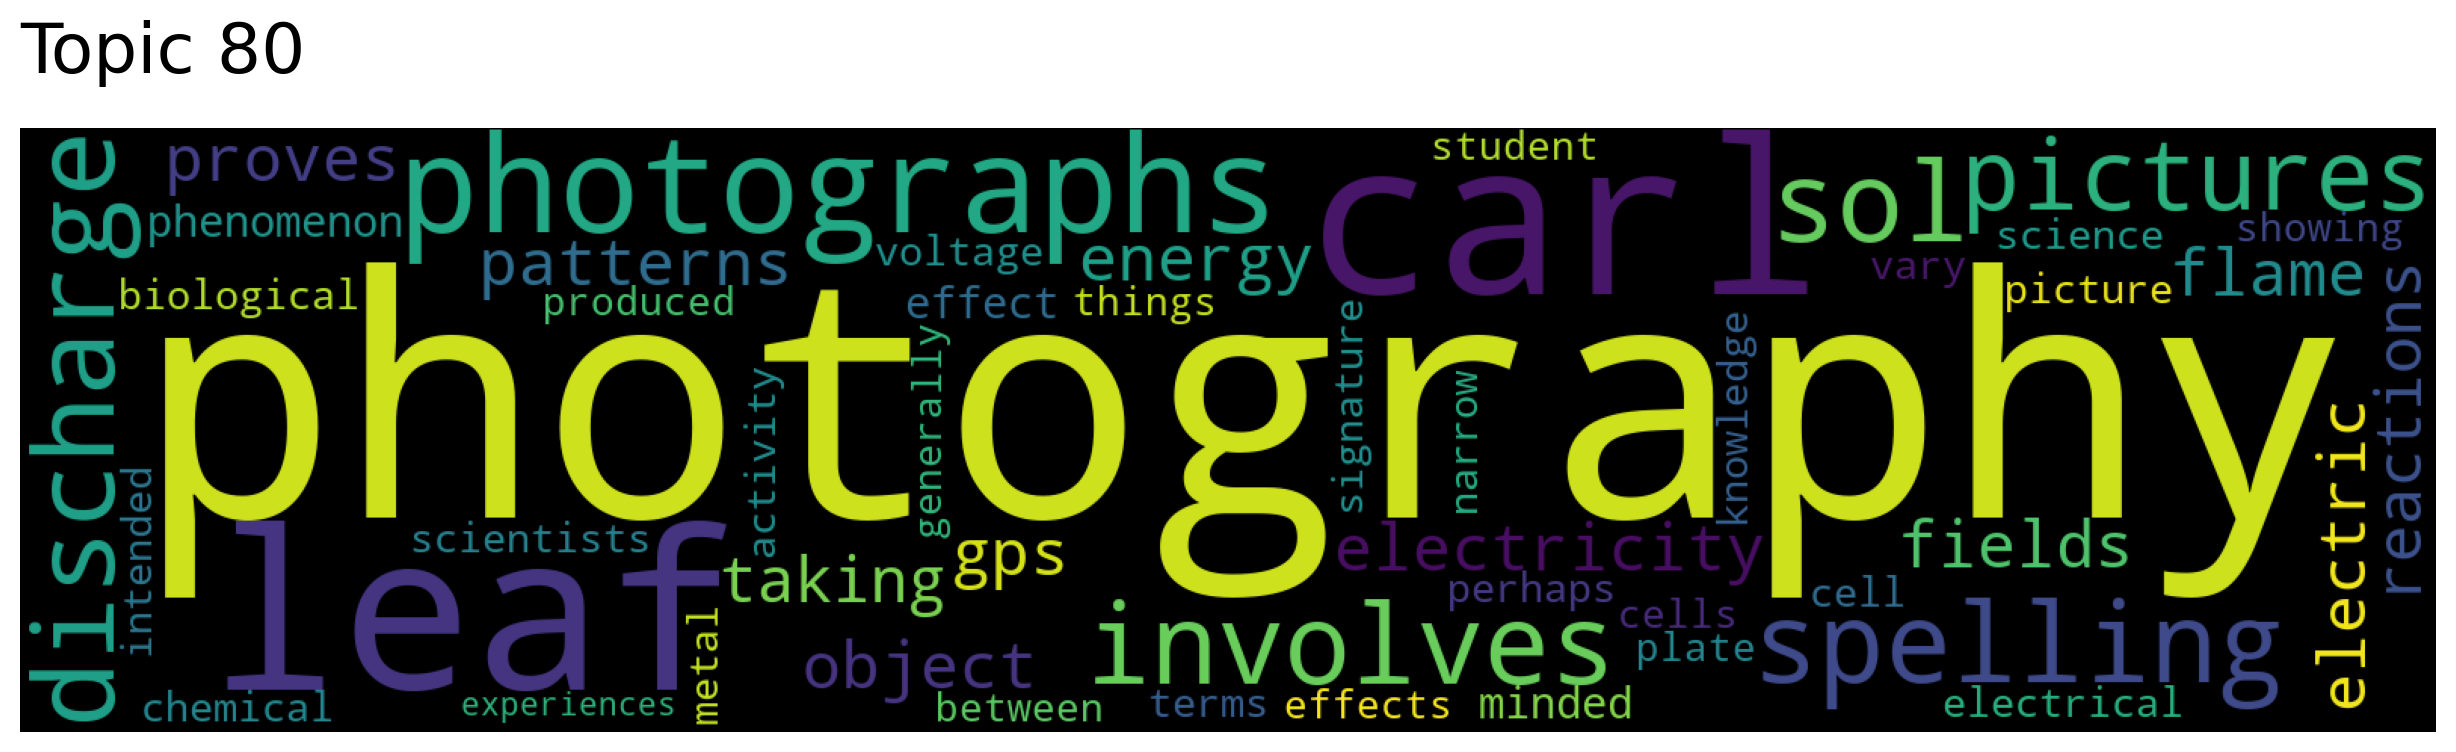

In [10]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

# Search Documents by Topic

We are going to search by topic 48, a topic that appears to be about `culture`.

In [18]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=48, num_docs=5)

Returns:

- `documents`: The documents in a list, the most similar are first.

- `doc_scores`: Semantic similarity of document to topic. The cosine similarity of the document and topic vector.

- `doc_ids`: Unique ids of documents. If ids were not given, the index of document in the original corpus.

For each of the returned documents we are going to print its content, score and document number.



In [11]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=48, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


Document: 12026, Score: 0.8937860727310181
-----------
1993 World Championships in Germany:

  Group A standings (Munich)            Group B standings (Dortmund)
  --------------------------            ----------------------------

             GP  W T L  GF-GA +/-  P                  GP  W T L  GF-GA +/-  P

  Canada      3  3 0 0  17- 1 +16  6    Czech republic 3  2 1 0   8- 1  +7  5
  Russia      3  2 1 0  12- 4  +8  5    Finland        3  2 1 0   5- 1  +4  5
  Sweden      3  2 0 1   8- 6  +2  4    USA            3  1 2 0   8- 3  +5  4
  Italy       3  1 1 1   5- 8  -3  3    Germany        3  2 0 1  11- 8  +3  4
  ----------------------------------    -------------------------------------
  Switzerland 3  0 0 3   0- 9  -9  0    France         3  0 0 3   4-13  -9  0
  Austria     3  0 0 3   2-16 -14  0    Norway         3  0 0 3   0-10 -10  0

 
 April 18:  Italy - Russia        2-2       Norway - Germany          0-6
            Sweden - Austria      1-0       USA - Czech republic  

# Semantic Search Documents by Keywords

Search documents for content semantically similar to cryptography and privacy.

In [12]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["cryptography", "privacy"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


Document: 16837, Score: 0.6337898373603821
-----------
Archive-name: net-privacy/part2
Last-modified: 1993/3/3
Version: 2.1


IDENTITY, PRIVACY, and ANONYMITY on the INTERNET

(c) 1993 L. Detweiler.  Not for commercial use except by permission
from author, otherwise may be freely copied.  Not to be altered. 
Please credit if quoted.

SUMMARY

Email and account privacy, anonymity, file encryption,  academic 
computer policies, relevant legislation and references, EFF, and 
other privacy and rights issues associated with use of the Internet
and global networks in general.

(Search for <#.#> for exact section. Search for '_' (underline) for
next section.)

PART 2
====== (this file)

Resources
---------

<4.1> What UNIX programs are related to privacy?
<4.2> How can I learn about or use cryptography?
<4.3> What is the cypherpunks mailing list?
<4.4> What are some privacy-related newsgroups?  FAQs?
<4.5> What is internet Privacy Enhanced Mail (PEM)?
<4.6> What are other Request For Comments

# Similar Keywords

Search for similar words to space.

In [13]:
words, word_scores = model.similar_words(keywords=["space"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

nasa 0.6789174870091815
shuttle 0.6657496195600409
planetary 0.5625000628344724
launch 0.5619946534357441
exploration 0.5384806639037858
missions 0.5264641637407956
telescope 0.5069756751094876
satellite 0.5027205231502956
orbital 0.49406865477892714
astronomy 0.49197589711684847
orbit 0.48766476476175424
lunar 0.4770586716732871
jsc 0.4763598807379349
ames 0.4600229720123082
spacecraft 0.4599926920815121
orbiting 0.4596255306139424
satellites 0.45419126639027996
flight 0.4537311141635347
propulsion 0.4516802116680915
mission 0.4471725045721088
